In [1]:
import os
import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
benchmark_dir = "/omics/groups/OE0540/internal/projects/LIVI/Benchmarks"

In [3]:
experiments_livi = os.listdir(os.path.join(benchmark_dir, "LIVI"))
experiments_livi

['2024-12-18_11-36_LIVIcis-cell-state_zdim15_900-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_Gseed200_best_LMM_results_BH-0.05_Ucontext.tsv',
 '2024-12-23_13-43_LIVIcis-cell-state_zdim15_100-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_Gseed200_best_LMM_results_BH-0.05_Ucontext.tsv',
 '2024-12-03_20-13_LIVIcis-cell-state_zdim15_500-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best_LMM_results_BH-0.05_Ucontext.tsv',
 '2024-12-20_14-34_LIVIcis-cell-state_zdim15_300-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_Gseed200_best_LMM_results_BH-0.05_Ucontext.tsv',
 '2024-12-05_10-20_LIVIcis-cell-state_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best_LMM_results_BH-0.05_Ucontext.tsv']

In [4]:
experiments_scITD = [di for di in os.listdir(os.path.join(benchmark_dir, "scITD"))
                     if os.path.isdir(os.path.join(benchmark_dir, "scITD", di))]
experiments_scITD

['scITD_14kgenes_300_factors_900_donors',
 'scITD_14kgenes_700_factors_900_donors',
 'scITD_14kgenes_500_factors_900_donors',
 'scITD_14kgenes_900_factors_900_donors',
 'scITD_14kgenes_100_factors_900_donors']

In [5]:
experiments_scITD = [os.path.join(benchmark_dir, "scITD", exp, f"{exp}_LMM_results_BH-0.05_Ucontext.tsv")
                   for exp in experiments_scITD]
experiments_scITD 

['/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/scITD/scITD_14kgenes_300_factors_900_donors/scITD_14kgenes_300_factors_900_donors_LMM_results_BH-0.05_Ucontext.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/scITD/scITD_14kgenes_700_factors_900_donors/scITD_14kgenes_700_factors_900_donors_LMM_results_BH-0.05_Ucontext.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/scITD/scITD_14kgenes_500_factors_900_donors/scITD_14kgenes_500_factors_900_donors_LMM_results_BH-0.05_Ucontext.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/scITD/scITD_14kgenes_900_factors_900_donors/scITD_14kgenes_900_factors_900_donors_LMM_results_BH-0.05_Ucontext.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/scITD/scITD_14kgenes_100_factors_900_donors/scITD_14kgenes_100_factors_900_donors_LMM_results_BH-0.05_Ucontext.tsv']

In [6]:
experiments_pca = [di for di in os.listdir(os.path.join(benchmark_dir, "PCA")) 
                   if os.path.isdir(os.path.join(benchmark_dir, "PCA",di)) and "0_PCs" in di]
experiments_pca

['700_PCs', '50_PCs', '500_PCs', '300_PCs', '100_PCs', '20_PCs', '900_PCs']

In [7]:
experiments_pca = [os.path.join(benchmark_dir, "PCA", exp, f"All_celltypes_LMM_results_{exp.replace('_', '-')}-benchmark_significant_BH_005.tsv")
                   for exp in experiments_pca]
experiments_pca 

['/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/700_PCs/All_celltypes_LMM_results_700-PCs-benchmark_significant_BH_005.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/50_PCs/All_celltypes_LMM_results_50-PCs-benchmark_significant_BH_005.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/500_PCs/All_celltypes_LMM_results_500-PCs-benchmark_significant_BH_005.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/300_PCs/All_celltypes_LMM_results_300-PCs-benchmark_significant_BH_005.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/100_PCs/All_celltypes_LMM_results_100-PCs-benchmark_significant_BH_005.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/20_PCs/All_celltypes_LMM_results_20-PCs-benchmark_significant_BH_005.tsv',
 '/omics/groups/OE0540/internal/projects/LIVI/Benchmarks/PCA/900_PCs/All_celltypes_LMM_results_900-PCs-benchmark_significant_BH_005.tsv']

In [8]:
n_discoveries = {}

for exp in experiments_livi:
    nfactors = re.search("([0-9]{3}-gxc)", exp).groups()[0].replace("-gxc", "")
    lmm_results = pd.read_csv(os.path.join(benchmark_dir, "LIVI", exp), 
                              sep="\t", index_col=False)
    n_discoveries[f"{nfactors}_LIVI"] = lmm_results.SNP_id.nunique()

n_discoveries

{'900_LIVI': 807,
 '100_LIVI': 501,
 '500_LIVI': 734,
 '300_LIVI': 693,
 '700_LIVI': 941}

In [9]:
for exp in experiments_scITD:
    nfactors = re.search("([0-9]{3}_factors)", exp).groups()[0].replace("_factors", "")
    lmm_results = pd.read_csv(exp, sep="\t", index_col=False)
    n_discoveries[f"{nfactors}_scITD"] = lmm_results.SNP_id.nunique()

n_discoveries

{'900_LIVI': 807,
 '100_LIVI': 501,
 '500_LIVI': 734,
 '300_LIVI': 693,
 '700_LIVI': 941,
 '300_scITD': 493,
 '700_scITD': 566,
 '500_scITD': 530,
 '900_scITD': 515,
 '100_scITD': 279}

In [10]:
for exp in experiments_pca:
    nfactors = re.search("([0-9]{2,3}-PCs)", exp).groups()[0].replace("-PCs", "")
    lmm_results = pd.read_csv(exp, sep="\t", index_col=False)
    n_discoveries[f"{nfactors}_PCA"] = lmm_results.SNP_id.nunique()

n_discoveries

{'900_LIVI': 807,
 '100_LIVI': 501,
 '500_LIVI': 734,
 '300_LIVI': 693,
 '700_LIVI': 941,
 '300_scITD': 493,
 '700_scITD': 566,
 '500_scITD': 530,
 '900_scITD': 515,
 '100_scITD': 279,
 '700_PCA': 648,
 '50_PCA': 771,
 '500_PCA': 680,
 '300_PCA': 709,
 '100_PCA': 809,
 '20_PCA': 512,
 '900_PCA': 117}

In [11]:
discoveries_vs_factors = pd.DataFrame.from_dict(n_discoveries, orient="index", columns=["N_SNPs"])
discoveries_vs_factors

,N_SNPs
900_LIVI,807
100_LIVI,501
500_LIVI,734
300_LIVI,693
700_LIVI,941
300_scITD,493
700_scITD,566
500_scITD,530
900_scITD,515
100_scITD,279


In [12]:
discoveries_vs_factors = discoveries_vs_factors.assign(tmp = discoveries_vs_factors.index)
discoveries_vs_factors[["N_latent_variables", "Method"]] = discoveries_vs_factors.tmp.str.split("_", expand=True)
discoveries_vs_factors.N_latent_variables = discoveries_vs_factors.N_latent_variables.astype(int)
discoveries_vs_factors.N_SNPs = discoveries_vs_factors.N_SNPs.astype(int)
discoveries_vs_factors.drop(columns="tmp", inplace=True)
discoveries_vs_factors

,N_SNPs,N_latent_variables,Method
900_LIVI,807,900,LIVI
100_LIVI,501,100,LIVI
500_LIVI,734,500,LIVI
300_LIVI,693,300,LIVI
700_LIVI,941,700,LIVI
300_scITD,493,300,scITD
700_scITD,566,700,scITD
500_scITD,530,500,scITD
900_scITD,515,900,scITD
100_scITD,279,100,scITD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


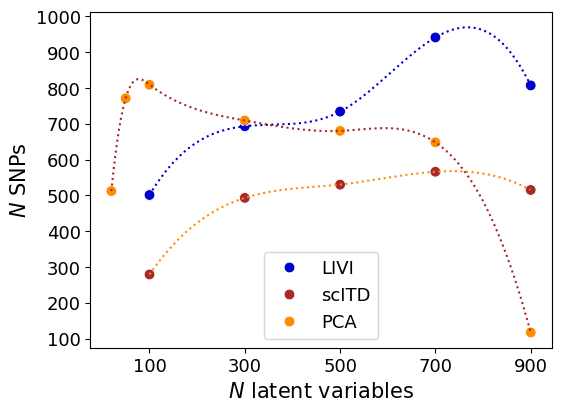

In [13]:
from scipy.interpolate import interp1d

fig, axs = plt.subplots(nrows=1, figsize = (5.5,4), constrained_layout=True)
sns.scatterplot(x="N_latent_variables", y="N_SNPs", data=discoveries_vs_factors, ax=axs, 
                hue="Method", palette=["mediumblue", "brown", "darkorange"], s=60, rasterized=True)
axs.set_xticks(np.arange(100, axs.get_xticks()[-1]+200, 200), np.arange(100, axs.get_xticks()[-1]+200, 200, dtype=int), fontsize=13)
axs.set_yticks(np.arange(100, axs.get_yticks()[-1]+100, 100), np.arange(100, axs.get_yticks()[-1]+100, 100, dtype=int), fontsize=13)
x = np.arange(axs.get_xticks()[0], axs.get_xticks()[-1]-200, dtype=int)

interpol = interp1d(x=discoveries_vs_factors.loc[discoveries_vs_factors.Method == "LIVI"].N_latent_variables, 
         y=discoveries_vs_factors.loc[discoveries_vs_factors.Method == "LIVI"].N_SNPs,
         kind = "cubic")
axs.plot(x, interpol(x), marker="", linestyle=":", color="mediumblue")
interpol = interp1d(x=discoveries_vs_factors.loc[discoveries_vs_factors.Method == "scITD"].N_latent_variables, 
         y=discoveries_vs_factors.loc[discoveries_vs_factors.Method == "scITD"].N_SNPs,
         kind = "cubic")
axs.plot(x, interpol(x), marker="", linestyle=":", color="darkorange")
interpol = interp1d(x=discoveries_vs_factors.loc[discoveries_vs_factors.Method == "PCA"].N_latent_variables, 
         y=discoveries_vs_factors.loc[discoveries_vs_factors.Method == "PCA"].N_SNPs,
         kind = "cubic")
x = np.arange(20, axs.get_xticks()[-1]-200, dtype=int)
axs.plot(x, interpol(x), marker="", linestyle=":", color="brown")

axs.set_xlabel("$N$ latent variables", fontdict={"fontsize":15})
axs.set_ylabel("$N$ SNPs", fontdict={"fontsize":15})
axs.legend(title="", fontsize=13)
plt.savefig(os.path.join(benchmark_dir, "Benchmark_N-discoveries_vs_N-factors.png"), 
            transparent=True, dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(benchmark_dir, "Benchmark_N-discoveries_vs_N-factors.eps"), 
            transparent=True, dpi=300, bbox_inches="tight")

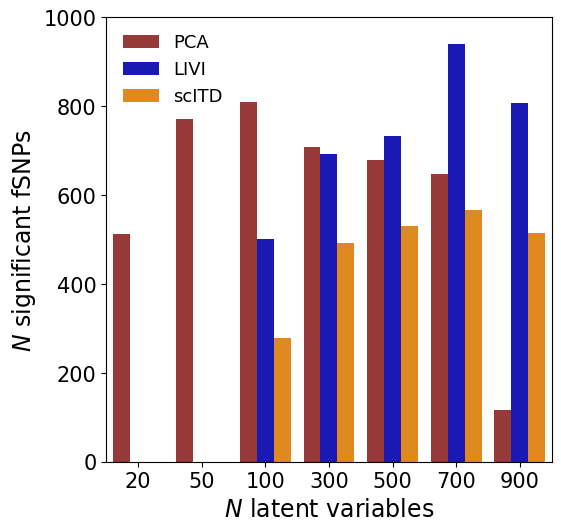

In [14]:
fig, axs = plt.subplots(nrows=1, figsize = (5.5,5.2), constrained_layout=True)
sns.barplot(x="N_latent_variables", y="N_SNPs", data=discoveries_vs_factors, ax=axs, 
                hue="Method", palette=["brown", "mediumblue", "darkorange"], rasterized=True)
axs.tick_params(axis="x", labelsize=15)
axs.set_yticks(np.arange(0, axs.get_yticks()[-1]+100, 200), np.arange(0, axs.get_yticks()[-1]+100, 200, dtype=int), fontsize=15)

axs.set_xlabel("$N$ latent variables", fontdict={"fontsize":17})
axs.set_ylabel("$N$ significant fSNPs", fontdict={"fontsize":17})
axs.legend(title="", fontsize=13, loc="upper left", frameon=False)
plt.savefig(os.path.join(benchmark_dir, "Benchmark_N-discoveries_vs_N-factors_barplot.png"), 
            transparent=True, dpi=400, bbox_inches="tight")
plt.savefig(os.path.join(benchmark_dir, "Benchmark_N-discoveries_vs_N-factors_barplot.eps"), 
            transparent=True, dpi=400, bbox_inches="tight")